In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

In [4]:
testPath = 'D:/NoteBook/G.P/PlantVillage/test/'

In [5]:
classesDict = {0:'T_Bacterial_spot', 1:'T_Early_blight', 2:'T_Healthy', 3:'T_Late_blight', 4:'T_Leaf_Mold', 5:'T_mosaic_virus', 6:'T_Septoria_leaf_spot', 7:'T_Spider_mites_Two_spotted', 8:'T_Target_Spot', 9:'T_YellowLeaf_Curl_Virus'}
classesDict

{0: 'T_Bacterial_spot',
 1: 'T_Early_blight',
 2: 'T_Healthy',
 3: 'T_Late_blight',
 4: 'T_Leaf_Mold',
 5: 'T_mosaic_virus',
 6: 'T_Septoria_leaf_spot',
 7: 'T_Spider_mites_Two_spotted',
 8: 'T_Target_Spot',
 9: 'T_YellowLeaf_Curl_Virus'}

### Load the model

In [6]:
from tensorflow.keras.models import load_model
TDCMv1 = load_model('D:/NoteBook/G.P/Models/TDCMv1.1.h5')

In [7]:
'''
    Function Description: It chooses a random image from a number of classes and returns the full path
                          to the image and its class.
    Input: Absolute path of the folder containing the classes.
    output: Absolute Path of the random image and its class
'''
def ChooseTestImage(path):
    imgDataClasses = os.listdir(path)
    rClass = random.choice(imgDataClasses)
    path = path + rClass + '/'
    imageData = os.listdir(path)
    rImage = random.choice(imageData)
    fullPath = path + rImage
    return fullPath, rClass

In [8]:
'''
    Function Description: This function prepares an image to meet the requirement of the mobileNet architecture
    Input: Absolute path of the image.
    output: preprocessed image
'''
def prepare_image(imgPath):
    img = image.load_img(imgPath, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [9]:
imgPath, tClass = ChooseTestImage(testPath)

T_mosaic_virus


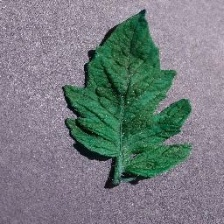

In [10]:
# Display the random image before preprocessing
from IPython.display import Image
print(tClass)
Image(filename=imgPath, width=224,height=224)

In [11]:
processedImage = prepare_image(imgPath)

In [12]:
prediction = TDCMv1.predict(processedImage) #Use the loaded model to predict the state of the tomato plant

In [13]:
prediction

array([[1.1808671e-05, 2.0529400e-03, 1.9379347e-03, 1.5467722e-05,
        2.6477320e-02, 9.6291244e-01, 2.5131507e-03, 3.6332414e-03,
        3.4009008e-04, 1.0552603e-04]], dtype=float32)

In [14]:
predictedClass = classesDict[int(prediction.argmax(axis=1))]

In [15]:
print(f"True Class : {tClass}")
print(f"Predicted Class : {predictedClass}")

True Class : T_mosaic_virus
Predicted Class : T_mosaic_virus


* Note: The model is confused between early_blight and late_blight classes